#Import Library

In [318]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

#Import Data

In [279]:
df = pd.read_csv('/content/Food_Delivery_Times.csv')

#Data Understanding

In [280]:
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [281]:
df.describe()

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,1000.000000,1000.000000,1000.000000,970.000000,1000.000000
mean,500.500000,10.059970,16.982000,4.579381,56.732000
std,288.819436,5.696656,7.204553,2.914394,22.070915
min,1.000000,0.590000,5.000000,0.000000,8.000000
25%,250.750000,5.105000,11.000000,2.000000,41.000000
50%,500.500000,10.190000,17.000000,5.000000,55.500000
75%,750.250000,15.017500,23.000000,7.000000,71.000000
max,1000.000000,19.990000,29.000000,9.000000,153.000000


#Duplicate

In [282]:
df.duplicated().sum()

np.int64(0)

#Missing Values

In [283]:
df.isnull().sum()

,0
Order_ID,0
Distance_km,0
Weather,30
Traffic_Level,30
Time_of_Day,30
Vehicle_Type,0
Preparation_Time_min,0
Courier_Experience_yrs,30
Delivery_Time_min,0


In [284]:
df['Weather'] = df['Weather'].fillna(df['Weather'].mode()[0])
df['Traffic_Level'] = df['Traffic_Level'].fillna(df['Traffic_Level'].mode()[0])
df['Time_of_Day'] = df['Time_of_Day'].fillna(df['Time_of_Day'].mode()[0])

df['Courier_Experience_yrs'] = df['Courier_Experience_yrs'].fillna(df['Courier_Experience_yrs'].median())
df.isnull().sum()

,0
Order_ID,0
Distance_km,0
Weather,0
Traffic_Level,0
Time_of_Day,0
Vehicle_Type,0
Preparation_Time_min,0
Courier_Experience_yrs,0
Delivery_Time_min,0


#EDA (Numerik Kontinu)

##Distance KM vs Delivery Time

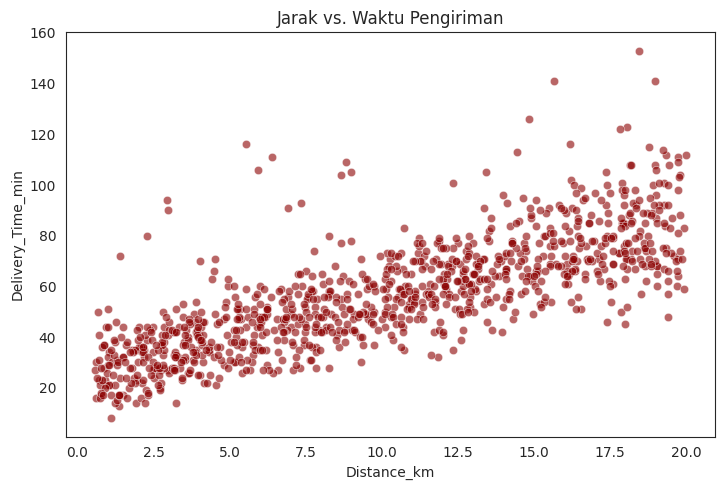

In [285]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 2)
sns.scatterplot(x='Distance_km', y='Delivery_Time_min', data=df, alpha=0.6, color='darkred')
plt.title('Jarak vs. Waktu Pengiriman')

plt.tight_layout()
plt.show()

##Preparation Time vs Delivery Time

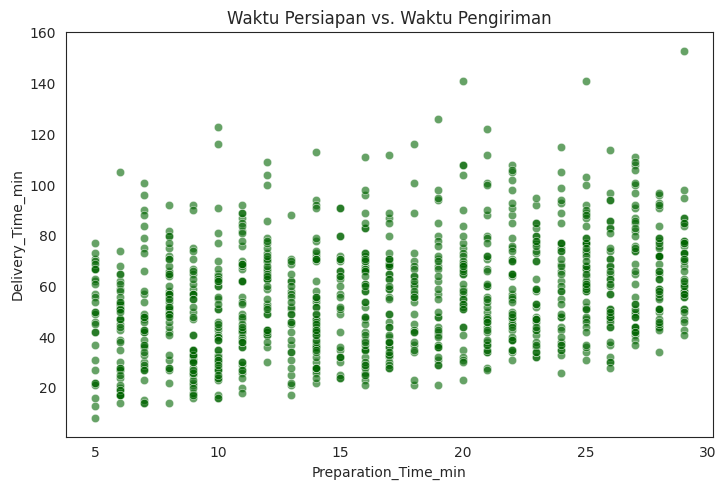

In [286]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 2)
sns.scatterplot(x='Preparation_Time_min', y='Delivery_Time_min', data=df, alpha=0.6, color='darkgreen')
plt.title('Waktu Persiapan vs. Waktu Pengiriman')

plt.tight_layout()
plt.show()

##Courier Experience vs Delivery time

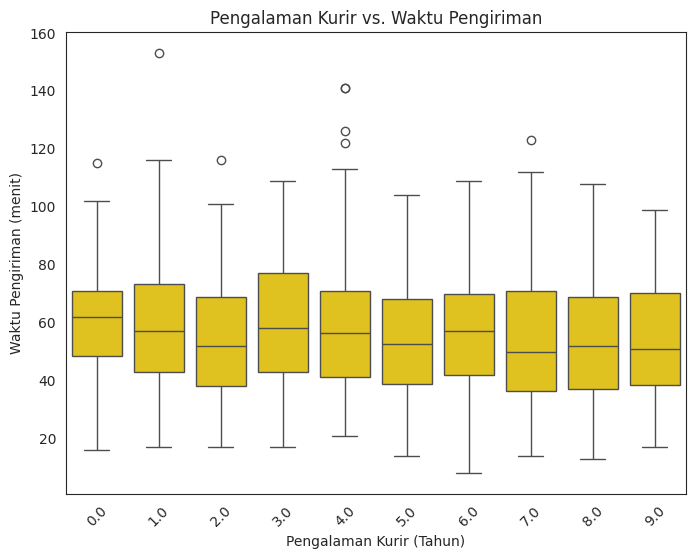

In [287]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Courier_Experience_yrs', y='Delivery_Time_min', data=df, color='gold')
plt.title('Pengalaman Kurir vs. Waktu Pengiriman')
plt.xlabel('Pengalaman Kurir (Tahun)')
plt.ylabel('Waktu Pengiriman (menit)')
plt.xticks(rotation=45)
plt.show()

#EDA (Kategorikal)

##Weather

/tmp/ipython-input-3738115568.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Weather', y='Delivery_Time_min', data=df, palette='Set2')


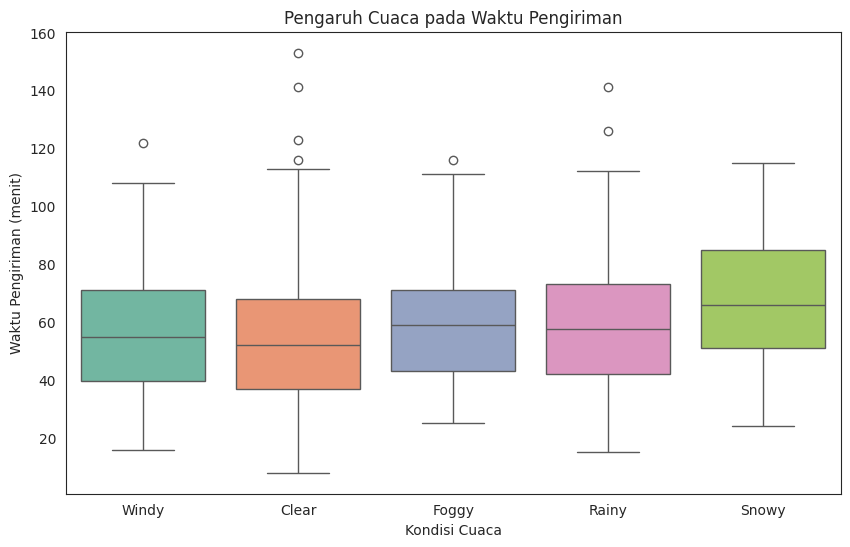

In [288]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Weather', y='Delivery_Time_min', data=df, palette='Set2')
plt.title('Pengaruh Cuaca pada Waktu Pengiriman')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Waktu Pengiriman (menit)')
plt.show()

##Traffic

/tmp/ipython-input-962090785.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Traffic_Level', y='Delivery_Time_min', data=df, order=traffic_order, palette='Set1')


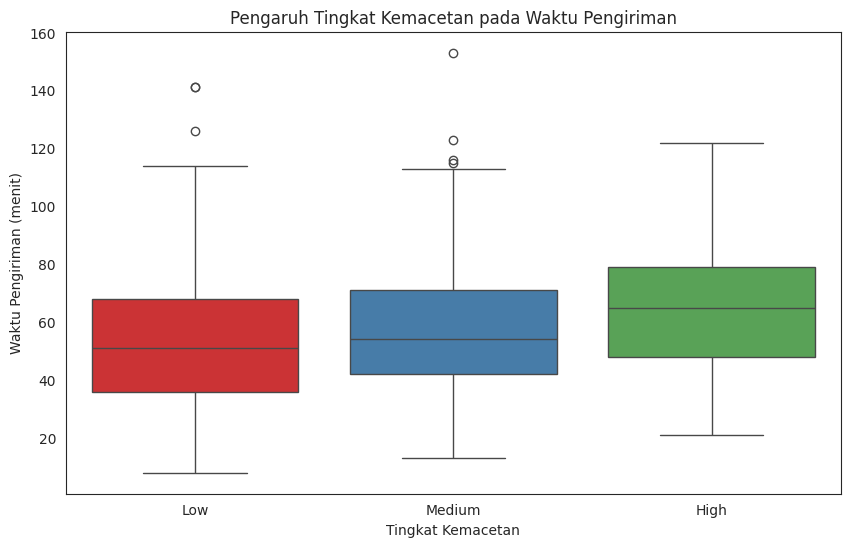

In [289]:
plt.figure(figsize=(10, 6))
# Urutkan kategori secara logis
traffic_order = ['Low', 'Medium', 'High']
sns.boxplot(x='Traffic_Level', y='Delivery_Time_min', data=df, order=traffic_order, palette='Set1')
plt.title('Pengaruh Tingkat Kemacetan pada Waktu Pengiriman')
plt.xlabel('Tingkat Kemacetan')
plt.ylabel('Waktu Pengiriman (menit)')
plt.show()

##Time of The Day

/tmp/ipython-input-605968173.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Time_of_Day', y='Delivery_Time_min', data=df, order=time_order, palette='Pastel1')


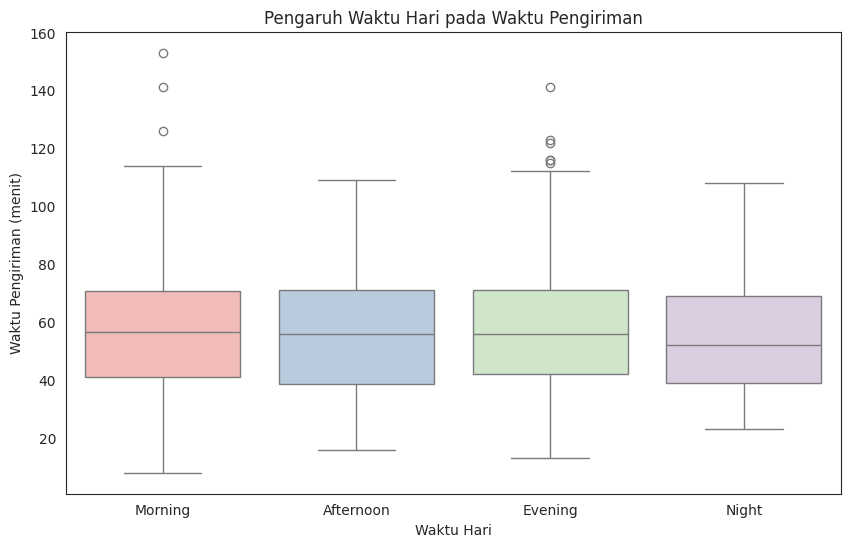

In [290]:
plt.figure(figsize=(10, 6))
# Urutkan kategori secara kronologis
time_order = ['Morning', 'Afternoon', 'Evening', 'Night']
sns.boxplot(x='Time_of_Day', y='Delivery_Time_min', data=df, order=time_order, palette='Pastel1')
plt.title('Pengaruh Waktu Hari pada Waktu Pengiriman')
plt.xlabel('Waktu Hari')
plt.ylabel('Waktu Pengiriman (menit)')
plt.show()

##Vehicle Type

/tmp/ipython-input-3650416501.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Vehicle_Type', y='Delivery_Time_min', data=df, palette='Dark2')


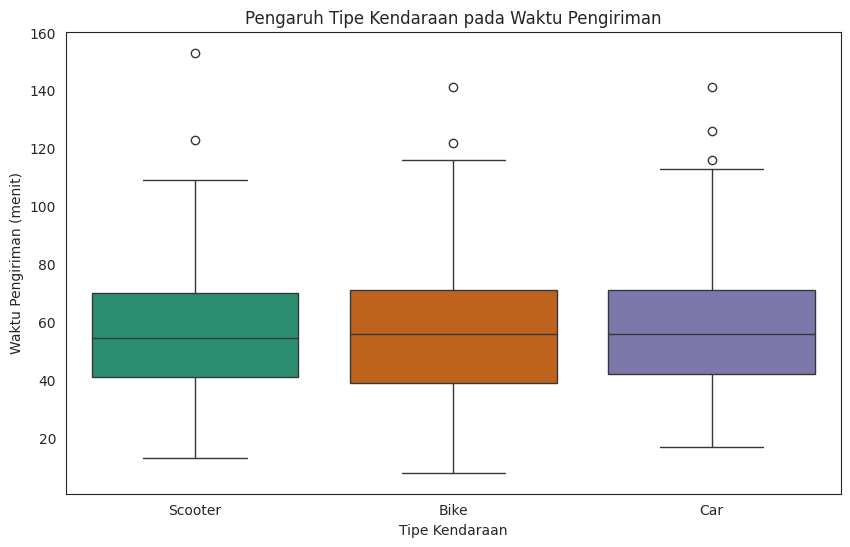

In [291]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Vehicle_Type', y='Delivery_Time_min', data=df, palette='Dark2')
plt.title('Pengaruh Tipe Kendaraan pada Waktu Pengiriman')
plt.xlabel('Tipe Kendaraan')
plt.ylabel('Waktu Pengiriman (menit)')
plt.show()

##Heatmap

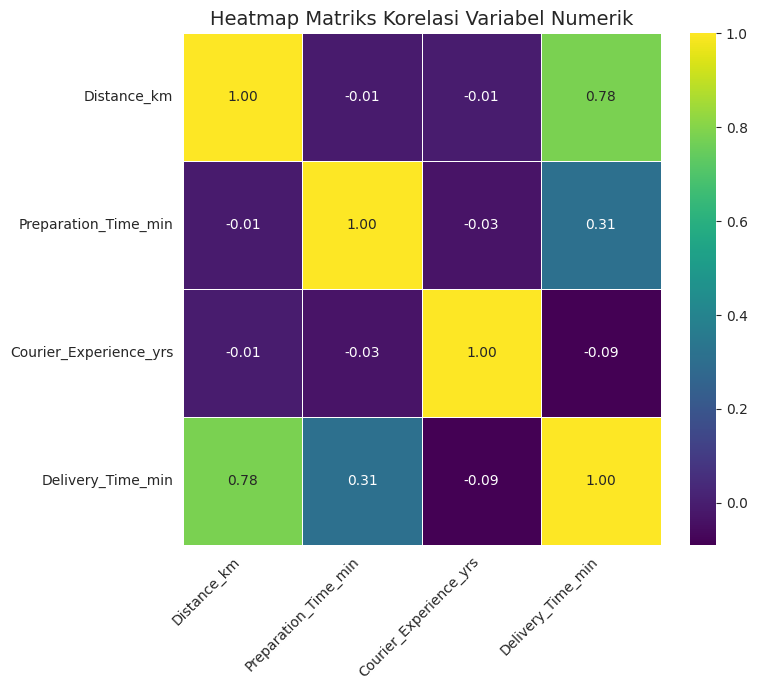

In [292]:
numerical_cols = ['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs', 'Delivery_Time_min']
df_numeric = df[numerical_cols].dropna() # Gunakan dropna untuk keamanan, meskipun sudah di-handle

# Hitung matriks korelasi Pearson
corr_matrix = df_numeric.corr()

sns.set_style("white")

plt.figure(figsize=(8, 7))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='viridis',
    fmt=".2f",
    linewidths=.5,
    cbar=True
)
plt.title('Heatmap Matriks Korelasi Variabel Numerik', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#Feature Engineering

In [293]:
df.drop('Order_ID', axis=1, inplace=True)

In [294]:
categorical_cols = ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [298]:
for col in df.columns:
    if df[col].dtype == 'bool':
        df[col] = df[col].astype(int)

In [299]:
df.head()

,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy,Traffic_Level_Low,Traffic_Level_Medium,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Vehicle_Type_Car,Vehicle_Type_Scooter
0,7.93,12,1.0,43,0,0,0,1,1,0,0,0,0,0,1
1,16.42,20,2.0,84,0,0,0,0,0,1,1,0,0,0,0
2,9.52,28,1.0,59,1,0,0,0,1,0,0,0,1,0,1
3,7.44,5,1.0,37,0,1,0,0,0,1,0,0,0,0,1
4,19.03,16,5.0,68,0,0,0,0,1,0,0,1,0,0,0


#Separate fitur and target

In [301]:
X = df.drop(columns=['Delivery_Time_min'])
y = df['Delivery_Time_min']

In [302]:
X = X.astype(np.float64)

#Multicollinearity test

In [303]:
# Tambahkan konstanta (intercept)
X_vif = add_constant(X)

# Hitung VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i)
                    for i in range(X_vif.shape[1])]

# Tampilkan Hasil VIF
vif_data = vif_data[vif_data['Feature'] != 'const'].sort_values(by='VIF', ascending=False).reset_index(drop=True)

print("\n--- Hasil Uji Multikolinearitas (VIF) ---")
print(vif_data)

# Jika VIF rendah (seperti hasil sebelumnya), kita lanjutkan.


--- Hasil Uji Multikolinearitas (VIF) ---
                   Feature       VIF
0        Traffic_Level_Low  1.835450
1     Traffic_Level_Medium  1.832427
2      Time_of_Day_Morning  1.460708
3      Time_of_Day_Evening  1.445785
4        Time_of_Day_Night  1.204527
5            Weather_Rainy  1.134007
6     Vehicle_Type_Scooter  1.133281
7         Vehicle_Type_Car  1.130131
8            Weather_Snowy  1.097960
9            Weather_Windy  1.094795
10           Weather_Foggy  1.090946
11  Courier_Experience_yrs  1.014734
12             Distance_km  1.011332
13    Preparation_Time_min  1.006578


#Train Test Split

In [304]:
numerical_cols = ['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs']

In [305]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [306]:
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

#Modelling

##Linear Reggresion

In [309]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [310]:
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

coefficients

,Feature,Coefficient
0,Distance_km,17.174420
5,Weather_Snowy,9.246816
1,Preparation_Time_min,7.000229
3,Weather_Foggy,5.816452
4,Weather_Rainy,4.639445
6,Weather_Windy,1.446947
9,Time_of_Day_Evening,1.004784
12,Vehicle_Type_Car,0.517729
10,Time_of_Day_Morning,-0.169274
13,Vehicle_Type_Scooter,-0.934973


##Lasso Reggresion

In [311]:
from sklearn.linear_model import Lasso
import pandas as pd

lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)

Lasso()

In [312]:
lasso_coefficients = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": lasso_model.coef_
}).sort_values(by="Coefficient", ascending=False)

lasso_coefficients

,Feature,Coefficient
0,Distance_km,16.388799
1,Preparation_Time_min,6.068796
3,Weather_Foggy,0.000000
4,Weather_Rainy,0.000000
5,Weather_Snowy,0.000000
6,Weather_Windy,-0.000000
12,Vehicle_Type_Car,0.000000
8,Traffic_Level_Medium,-0.000000
9,Time_of_Day_Evening,0.000000
10,Time_of_Day_Morning,-0.000000


##Ridge Reggression

In [313]:
from sklearn.linear_model import Ridge
import pandas as pd

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

Ridge()

In [314]:
ridge_coefficients = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": ridge_model.coef_
}).sort_values(by="Coefficient", ascending=False)

ridge_coefficients


,Feature,Coefficient
0,Distance_km,17.156908
5,Weather_Snowy,9.083417
1,Preparation_Time_min,6.990774
3,Weather_Foggy,5.689690
4,Weather_Rainy,4.566342
6,Weather_Windy,1.384535
9,Time_of_Day_Evening,1.000586
12,Vehicle_Type_Car,0.524382
10,Time_of_Day_Morning,-0.167628
13,Vehicle_Type_Scooter,-0.932251


##Random Forest

In [321]:
rf_model = RandomForestRegressor(
    random_state=42,
    n_estimators=100,
    max_depth=10
)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

In [328]:
rf_model = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=10)
rf_model.fit(X_train, y_train)
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False).reset_index(drop=True)

print("\n=== RANDOM FOREST FEATURE IMPORTANCE ===")
print(feature_importance_df)


=== RANDOM FOREST FEATURE IMPORTANCE ===
                   Feature  Importance
0              Distance_km    0.705339
1     Preparation_Time_min    0.157660
2   Courier_Experience_yrs    0.041751
3        Traffic_Level_Low    0.019075
4            Weather_Snowy    0.011432
5      Time_of_Day_Evening    0.010709
6            Weather_Rainy    0.010194
7            Weather_Foggy    0.008351
8         Vehicle_Type_Car    0.008221
9     Vehicle_Type_Scooter    0.007684
10    Traffic_Level_Medium    0.006838
11     Time_of_Day_Morning    0.005644
12       Time_of_Day_Night    0.004222
13           Weather_Windy    0.002879


##XGboost

In [315]:
xgb_model = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    learning_rate=0.1,
    random_state=42,
    n_jobs=-1
)
xgb_model.fit(X_train, y_train)
feature_importances = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": xgb_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Tampilkan 10 Fitur Terpenting
print("\n=== XGBOOST FEATURE IMPORTANCE (Berdasarkan GAIN) ===")
print(feature_importances.head(10))


=== XGBOOST FEATURE IMPORTANCE (Berdasarkan GAIN) ===
                   Feature  Importance
0              Distance_km    0.329332
1     Preparation_Time_min    0.117551
7        Traffic_Level_Low    0.077273
8     Traffic_Level_Medium    0.057836
3            Weather_Foggy    0.055949
13    Vehicle_Type_Scooter    0.055210
4            Weather_Rainy    0.047918
2   Courier_Experience_yrs    0.045032
5            Weather_Snowy    0.043881
12        Vehicle_Type_Car    0.042044


#Model Evaluation

In [316]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / (y_true + 1e-10))) * 100

# Fungsi Evaluasi Lengkap
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    return mae, rmse, r2, mape

In [329]:
models = {
    "1. Linear Regression": LinearRegression(),
    "2. Ridge Regression (Alpha=1.0)": Ridge(alpha=1.0, random_state=42),
    "3. Lasso Regression (Alpha=0.1)": Lasso(alpha=0.1, random_state=42),
    "4. Random Forest Regressor": RandomForestRegressor(random_state=42, n_estimators=100, max_depth=10),
}
if XGBRegressor:
    models["5. XGBoost Regressor"] = XGBRegressor(random_state=42, n_jobs=-1, objective='reg:squarederror', n_estimators=100, learning_rate=0.1)

results = {}
print("\n--- Pelatihan dan Evaluasi Model Komparatif Dimulai ---")

for name, model in models.items():
    print(f"⌛ Melatih {name}...")
    try:
        # Pelatihan
        model.fit(X_train, y_train)

        # Prediksi
        y_pred = model.predict(X_test)

        # Evaluasi
        mae, rmse, r2, mape = evaluate_model(y_test, y_pred)
        results[name] = {"R2 Score": r2, "MAE": mae, "RMSE": rmse, "MAPE (%)": mape}

        print(f"✅ {name} selesai. R2 Score: {r2:.4f}, MAPE: {mape:.2f}%")
    except Exception as e:
        if "XGBRegressor" in name:
            print(f"❌ GAGAL: {name} memerlukan library 'xgboost' yang belum terinstal.")
        else:
            print(f"❌ ERROR saat melatih {name}: {e}")

# Ringkasan Hasil
results_df = pd.DataFrame(results).T
print("\n--- RINGKASAN EVALUASI MODEL AKHIR (Diurutkan berdasarkan R2 Score) ---")
print(results_df.sort_values(by='R2 Score', ascending=False))


--- Pelatihan dan Evaluasi Model Komparatif Dimulai ---
⌛ Melatih 1. Linear Regression...
✅ 1. Linear Regression selesai. R2 Score: 0.8262, MAPE: 10.41%
⌛ Melatih 2. Ridge Regression (Alpha=1.0)...
✅ 2. Ridge Regression (Alpha=1.0) selesai. R2 Score: 0.8256, MAPE: 10.46%
⌛ Melatih 3. Lasso Regression (Alpha=0.1)...
✅ 3. Lasso Regression (Alpha=0.1) selesai. R2 Score: 0.8178, MAPE: 10.99%
⌛ Melatih 4. Random Forest Regressor...
✅ 4. Random Forest Regressor selesai. R2 Score: 0.7645, MAPE: 13.29%
⌛ Melatih 5. XGBoost Regressor...
✅ 5. XGBoost Regressor selesai. R2 Score: 0.7769, MAPE: 12.97%

--- RINGKASAN EVALUASI MODEL AKHIR (Diurutkan berdasarkan R2 Score) ---
                                 R2 Score       MAE       RMSE   MAPE (%)
1. Linear Regression             0.826189  5.899169   8.826470  10.407453
2. Ridge Regression (Alpha=1.0)  0.825567  5.913218   8.842251  10.455057
3. Lasso Regression (Alpha=0.1)  0.817770  6.091098   9.037726  10.990176
5. XGBoost Regressor             